# Word embeddings extraction 
This notebook is inspired from [this original TensorFlow documentation](https://www.tensorflow.org/tutorials/text/word_embeddings) example.



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import io

### Import the IMDB reviews dataset with 8 thousand subwords

In [2]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split = (tfds.Split.TRAIN, tfds.Split.TEST), 
                                          with_info=True, as_supervised=True)

train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

Shuffling and writing examples to /Users/pedramataee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMQE9US/imdb_reviews-train.tfrecord


Shuffling and writing examples to /Users/pedramataee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMQE9US/imdb_reviews-test.tfrecord


Shuffling and writing examples to /Users/pedramataee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMQE9US/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /Users/pedramataee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


### Define the model

In [ ]:
embedding_dim = 16 # Embedding dimension
encoder = info.features['text'].encoder
print('Vocabulary size: %d subwords\n' % encoder.vocab_size)

model = keras.Sequential([layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1)])

model.summary()

Vocabulary size: 8185 subwords

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


### Start training

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.5017 - accuracy: 0.7093 - val_loss: 0.3626 - val_accuracy: 0.8850
Epoch 2/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2762 - accuracy: 0.8853 - val_loss: 0.4161 - val_accuracy: 0.7850
Epoch 3/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2253 - accuracy: 0.9104 - val_loss: 0.3168 - val_accuracy: 0.8750
Epoch 4/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.1950 - accuracy: 0.9244 - val_loss: 0.3083 - val_accuracy: 0.8800
Epoch 5/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.1730 - accuracy: 0.9344 - val_loss: 0.3604 - val_accuracy: 0.8650
Epoch 6/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.1543 - accuracy: 0.9439 - val_loss: 0.3697 - val_accuracy: 0.8700
Epoch 7/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.1380 - accuracy: 0.9506 - val_loss: 0.5260 - val_ac

### Plot loss and accuracy

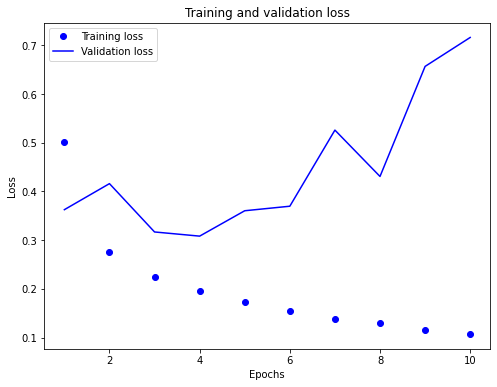

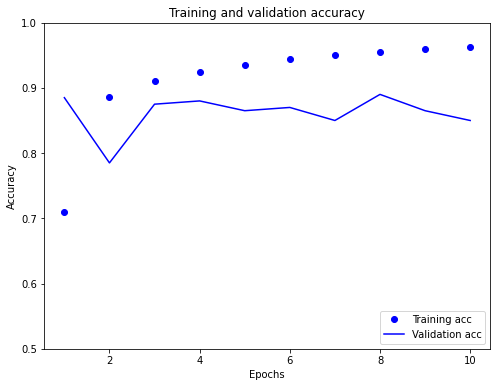

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

### Retrieve embedding vectors

In [ ]:
# The embedding vectors are the weight of the Embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [ ]:
# Create TSV files for Tensorflow Projector
encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")

out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')